In [25]:
!pip3 install pip install icecream

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: lightning-lite 1.8.0 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lightning-lite or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import av
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
from icecream import ic
from collections import defaultdict

In [3]:
df = pd.read_csv("data.csv")
df

,Unnamed: 0,name_video,label
0,0,videos/video_0000.mp4,tap dancing
1,1,videos/video_0001.mp4,tap dancing
2,2,videos/video_0002.mp4,tap dancing
3,3,videos/video_0003.mp4,tap dancing
4,4,videos/video_0004.mp4,tap dancing
...,...,...,...
2460,2460,videos/video_2460.mp4,tango dancing
2461,2461,videos/video_2461.mp4,tango dancing
2462,2462,videos/video_2462.mp4,tango dancing
2463,2463,videos/video_2463.mp4,tango dancing


In [ ]:
import pandas as pd
import cv2
import os

# Функция для сохранения изображения из видео по указанному времени
def save_frame(video_path, output_folder, label, frame_time):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_MSEC, frame_time * 1000)  # Установка времени в миллисекундах
    ret, frame = cap.read()
    cap.release()

    class_folder = os.path.join(output_folder, str(label))
    os.makedirs(class_folder, exist_ok=True)

    image_name = os.path.splitext(os.path.basename(video_path))[0] + "_frame_" + str(frame_time) + ".jpg"
    image_path = os.path.join(class_folder, image_name)
    cv2.imwrite(image_path, frame)

# Загрузка CSV файла
csv_file = "DZ3/data.csv.csv"
df = pd.read_csv(csv_file)

# Папка, куда будут сохранены изображения
output_folder = "data"

# Количество изображений, которые нужно сохранить из каждого видео
num_images_per_video = 5

# Проход по каждой строке CSV файла
for index, row in df.iterrows():
    video_name = row['name_video']
    label = row['label']
    video_path = os.path.join("data", video_name)  # Путь к видеофайлу

    # Определение интервала времени между изображениями
    total_frames = int(cv2.VideoCapture(video_path).get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = total_frames // (num_images_per_video + 1)

    # Сохранение изображений из видео
    for i in range(1, num_images_per_video + 1):
        frame_time = i * frame_interval
        save_frame(video_path, output_folder, label, frame_time)

print("Изображения сохранены в папке data.")

In [4]:
model=models.vgg11(pretrained=True)
print(model)

/home/yus/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yus/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [5]:
shapes=os.listdir('data/train')
shapes={e:i for i,e in enumerate(shapes)}
num_classes=len(shapes)
ic(num_classes)
_=ic(shapes)

ic| num_classes: 15
ic| shapes: {'belly_dancing': 2,
             'breakdancing': 7,
             'country_line_dancing': 12,
             'dancing_ballet': 1,
             'dancing_charleston': 14,
             'dancing_gangnam_style': 8,
             'dancing_macarena': 5,
             'jumpstyle_dancing': 13,
             'mosh_pit_dancing': 0,
             'robot_dancing': 11,
             'salsa_dancing': 9,
             'square_dancing': 6,
             'swing_dancing': 3,
             'tango_dancing': 10,
             'tap_dancing': 4}


In [6]:
image_datasets={x:datasets.ImageFolder(os.path.join('data',x),transforms.Compose([transforms.ToTensor()])) for x in ['train','val','test']}
dataloaders_dict={x:torch.utils.data.DataLoader(image_datasets[x],batch_size=32,shuffle=True,num_workers=4) for x in ['train','val','test']}
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
_=ic(device)

ic| device: device(type='cuda', index=0)


In [7]:
# Freeze the features layers
for param in model.parameters():
    param.requires_grad = False
    
model.classifier[6]=nn.Linear(4096,num_classes)
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [8]:
optimizer=optim.Adam(model.parameters())
criterion=torch.nn.CrossEntropyLoss()

In [9]:
loss_history = {'train': [], 'val': [], 'test': []}
acc_history = {'train': [], 'val': [], 'test': []}
best_weights, bests_acc = copy.deepcopy(model.state_dict()), 0.0

Epoch: 0


ic| epoch: 0
    phase: 'train'
    epoch_loss: tensor(0.4168, device='cuda:0')
    epoch_acc: tensor(0.4168, device='cuda:0', dtype=torch.float64)
ic| epoch: 0
    phase: 'val'
    epoch_loss: tensor(0.2503, device='cuda:0')
    epoch_acc: tensor(0.2503, device='cuda:0', dtype=torch.float64)
ic| epoch: 0
    phase: 'test'
    epoch_loss: tensor(0.2752, device='cuda:0')
    epoch_acc: tensor(0.2752, device='cuda:0', dtype=torch.float64)


Epoch: 1


ic| epoch: 1
    phase: 'train'
    epoch_loss: tensor(0.4173, device='cuda:0')
    epoch_acc: tensor(0.4173, device='cuda:0', dtype=torch.float64)
ic| epoch: 1
    phase: 'val'
    epoch_loss: tensor(0.2400, device='cuda:0')
    epoch_acc: tensor(0.2400, device='cuda:0', dtype=torch.float64)
ic| epoch: 1
    phase: 'test'
    epoch_loss: tensor(0.2601, device='cuda:0')
    epoch_acc: tensor(0.2601, device='cuda:0', dtype=torch.float64)


Epoch: 2


ic| epoch: 2
    phase: 'train'
    epoch_loss: tensor(0.4249, device='cuda:0')
    epoch_acc: tensor(0.4249, device='cuda:0', dtype=torch.float64)
ic| epoch: 2
    phase: 'val'
    epoch_loss: tensor(0.2492, device='cuda:0')
    epoch_acc: tensor(0.2492, device='cuda:0', dtype=torch.float64)
ic| epoch: 2
    phase: 'test'
    epoch_loss: tensor(0.2581, device='cuda:0')
    epoch_acc: tensor(0.2581, device='cuda:0', dtype=torch.float64)


Epoch: 3


ic| epoch: 3
    phase: 'train'
    epoch_loss: tensor(0.4344, device='cuda:0')
    epoch_acc: tensor(0.4344, device='cuda:0', dtype=torch.float64)
ic| epoch: 3
    phase: 'val'
    epoch_loss: tensor(0.2584, device='cuda:0')
    epoch_acc: tensor(0.2584, device='cuda:0', dtype=torch.float64)
ic| epoch: 3
    phase: 'test'
    epoch_loss: tensor(0.2772, device='cuda:0')
    epoch_acc: tensor(0.2772, device='cuda:0', dtype=torch.float64)


Epoch: 4


ic| epoch: 4
    phase: 'train'
    epoch_loss: tensor(0.4319, device='cuda:0')
    epoch_acc: tensor(0.4319, device='cuda:0', dtype=torch.float64)
ic| epoch: 4
    phase: 'val'
    epoch_loss: tensor(0.2605, device='cuda:0')
    epoch_acc: tensor(0.2605, device='cuda:0', dtype=torch.float64)
ic| epoch: 4
    phase: 'test'
    epoch_loss: tensor(0.2873, device='cuda:0')
    epoch_acc: tensor(0.2873, device='cuda:0', dtype=torch.float64)


Epoch: 5


ic| epoch: 5
    phase: 'train'
    epoch_loss: tensor(0.4369, device='cuda:0')
    epoch_acc: tensor(0.4369, device='cuda:0', dtype=torch.float64)
ic| epoch: 5
    phase: 'val'
    epoch_loss: tensor(0.2666, device='cuda:0')
    epoch_acc: tensor(0.2666, device='cuda:0', dtype=torch.float64)
ic| epoch: 5
    phase: 'test'
    epoch_loss: tensor(0.2722, device='cuda:0')
    epoch_acc: tensor(0.2722, device='cuda:0', dtype=torch.float64)


Epoch: 6


ic| epoch: 6
    phase: 'train'
    epoch_loss: tensor(0.4306, device='cuda:0')
    epoch_acc: tensor(0.4306, device='cuda:0', dtype=torch.float64)
ic| epoch: 6
    phase: 'val'
    epoch_loss: tensor(0.2503, device='cuda:0')
    epoch_acc: tensor(0.2503, device='cuda:0', dtype=torch.float64)
ic| epoch: 6
    phase: 'test'
    epoch_loss: tensor(0.2752, device='cuda:0')
    epoch_acc: tensor(0.2752, device='cuda:0', dtype=torch.float64)


Epoch: 7


ic| epoch: 7
    phase: 'train'
    epoch_loss: tensor(0.4357, device='cuda:0')
    epoch_acc: tensor(0.4357, device='cuda:0', dtype=torch.float64)
ic| epoch: 7
    phase: 'val'
    epoch_loss: tensor(0.2686, device='cuda:0')
    epoch_acc: tensor(0.2686, device='cuda:0', dtype=torch.float64)
ic| epoch: 7
    phase: 'test'
    epoch_loss: tensor(0.2752, device='cuda:0')
    epoch_acc: tensor(0.2752, device='cuda:0', dtype=torch.float64)


Epoch: 8


ic| epoch: 8
    phase: 'train'
    epoch_loss: tensor(0.4326, device='cuda:0')
    epoch_acc: tensor(0.4326, device='cuda:0', dtype=torch.float64)
ic| epoch: 8
    phase: 'val'
    epoch_loss: tensor(0.2543, device='cuda:0')
    epoch_acc: tensor(0.2543, device='cuda:0', dtype=torch.float64)
ic| epoch: 8
    phase: 'test'
    epoch_loss: tensor(0.2641, device='cuda:0')
    epoch_acc: tensor(0.2641, device='cuda:0', dtype=torch.float64)


Epoch: 9


ic| epoch: 9
    phase: 'train'
    epoch_loss: tensor(0.4470, device='cuda:0')
    epoch_acc: tensor(0.4470, device='cuda:0', dtype=torch.float64)
ic| epoch: 9
    phase: 'val'
    epoch_loss: tensor(0.2554, device='cuda:0')
    epoch_acc: tensor(0.2554, device='cuda:0', dtype=torch.float64)


Accuracy: 0.40205099067065014
Precision: 0.3985150040911357
Recall: 0.40205099067065014
F1 Score: 0.39954317533579164


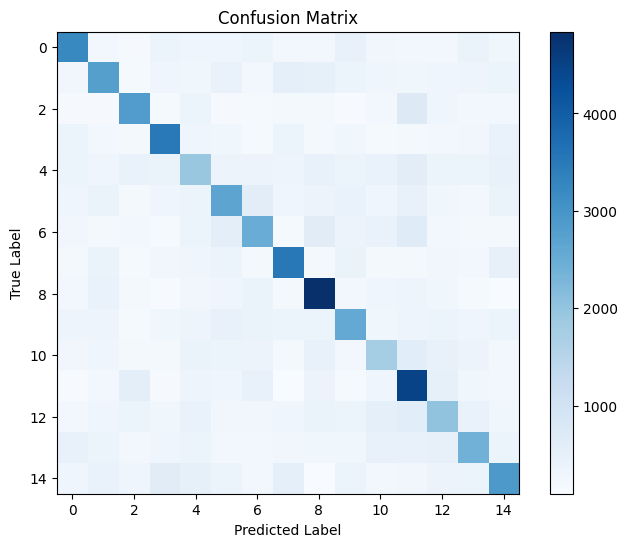

ic| epoch: 9
    phase: 'test'
    epoch_loss: tensor(0.2440, device='cuda:0')
    epoch_acc: tensor(0.2440, device='cuda:0', dtype=torch.float64)


In [13]:
import copy
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Инициализация пустой матрицы ошибок и списков для сохранения предсказаний и меток
all_preds = []
all_labels = []

# Цикл обучения и валидации
for epoch in range(10):
    print("Epoch:", epoch) 
    for phase in ['train', 'val', 'test']:
        if phase == 'train':
            model.train()
        elif phase == 'val' or phase == 'test':
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders_dict[phase]:
            torch.cuda.empty_cache()
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # Добавление предсказаний и меток в списки
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_corrects / len(dataloaders_dict[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders_dict[phase].dataset)
            loss_history[phase].append(epoch_loss)
            acc_history[phase].append(epoch_acc)

            if phase != 'test' and epoch_acc > bests_acc:
                best_weights = copy.deepcopy(model.state_dict())
                bests_acc = epoch_acc

            

        # Вывод информации о текущем эпохе и фазе
        _ = ic(epoch, phase, epoch_loss, epoch_acc)

        # Вывод матрицы ошибок и вычисление F1-меры после валидации
        if phase == 'val' and epoch==9:
            cm = confusion_matrix(all_labels, all_preds)
            accuracy = accuracy_score(all_labels, all_preds)
            precision = precision_score(all_labels, all_preds, average='weighted')
            recall = recall_score(all_labels, all_preds, average='weighted')
            f1 = f1_score(all_labels, all_preds, average='weighted')
            print('Accuracy:', accuracy)
            print('Precision:', precision)
            print('Recall:', recall)
            print('F1 Score:', f1)

            # Отрисовка матрицы ошибок
            plt.figure(figsize=(8, 6))
            plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title('Confusion Matrix')
            plt.colorbar()
            # plt.xticks(range(len(classes)), classes, rotation=45)
            # plt.yticks(range(len(classes)), classes)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

Epoch: 0


ic| epoch: 0
    phase: 'train'
    epoch_loss: tensor(0.4459, device='cuda:0')
    epoch_acc: tensor(0.4459, device='cuda:0', dtype=torch.float64)
ic| epoch: 0
    phase: 'val'
    epoch_loss: tensor(0.2349, device='cuda:0')
    epoch_acc: tensor(0.2349, device='cuda:0', dtype=torch.float64)
ic| epoch: 0
    phase: 'test'
    epoch_loss: tensor(0.2681, device='cuda:0')
    epoch_acc: tensor(0.2681, device='cuda:0', dtype=torch.float64)


Epoch: 1


ic| epoch: 1
    phase: 'train'
    epoch_loss: tensor(0.4389, device='cuda:0')
    epoch_acc: tensor(0.4389, device='cuda:0', dtype=torch.float64)
ic| epoch: 1
    phase: 'val'
    epoch_loss: tensor(0.2727, device='cuda:0')
    epoch_acc: tensor(0.2727, device='cuda:0', dtype=torch.float64)
ic| epoch: 1
    phase: 'test'
    epoch_loss: tensor(0.2802, device='cuda:0')
    epoch_acc: tensor(0.2802, device='cuda:0', dtype=torch.float64)


Epoch: 2


ic| epoch: 2
    phase: 'train'
    epoch_loss: tensor(0.4490, device='cuda:0')
    epoch_acc: tensor(0.4490, device='cuda:0', dtype=torch.float64)
ic| epoch: 2
    phase: 'val'
    epoch_loss: tensor(0.2298, device='cuda:0')
    epoch_acc: tensor(0.2298, device='cuda:0', dtype=torch.float64)
ic| epoch: 2
    phase: 'test'
    epoch_loss: tensor(0.2540, device='cuda:0')
    epoch_acc: tensor(0.2540, device='cuda:0', dtype=torch.float64)


Epoch: 3


ic| epoch: 3
    phase: 'train'
    epoch_loss: tensor(0.4697, device='cuda:0')
    epoch_acc: tensor(0.4697, device='cuda:0', dtype=torch.float64)
ic| epoch: 3
    phase: 'val'
    epoch_loss: tensor(0.2594, device='cuda:0')
    epoch_acc: tensor(0.2594, device='cuda:0', dtype=torch.float64)
ic| epoch: 3
    phase: 'test'
    epoch_loss: tensor(0.2853, device='cuda:0')
    epoch_acc: tensor(0.2853, device='cuda:0', dtype=torch.float64)


Epoch: 4


ic| epoch: 4
    phase: 'train'
    epoch_loss: tensor(0.4869, device='cuda:0')
    epoch_acc: tensor(0.4869, device='cuda:0', dtype=torch.float64)
ic| epoch: 4
    phase: 'val'
    epoch_loss: tensor(0.2717, device='cuda:0')
    epoch_acc: tensor(0.2717, device='cuda:0', dtype=torch.float64)
ic| epoch: 4
    phase: 'test'
    epoch_loss: tensor(0.2802, device='cuda:0')
    epoch_acc: tensor(0.2802, device='cuda:0', dtype=torch.float64)


Epoch: 5


ic| epoch: 5
    phase: 'train'
    epoch_loss: tensor(0.4903, device='cuda:0')
    epoch_acc: tensor(0.4903, device='cuda:0', dtype=torch.float64)
ic| epoch: 5
    phase: 'val'
    epoch_loss: tensor(0.2635, device='cuda:0')
    epoch_acc: tensor(0.2635, device='cuda:0', dtype=torch.float64)
ic| epoch: 5
    phase: 'test'
    epoch_loss: tensor(0.2853, device='cuda:0')
    epoch_acc: tensor(0.2853, device='cuda:0', dtype=torch.float64)


Epoch: 6


ic| epoch: 6
    phase: 'train'
    epoch_loss: tensor(0.4944, device='cuda:0')
    epoch_acc: tensor(0.4944, device='cuda:0', dtype=torch.float64)
ic| epoch: 6
    phase: 'val'
    epoch_loss: tensor(0.2646, device='cuda:0')
    epoch_acc: tensor(0.2646, device='cuda:0', dtype=torch.float64)
ic| epoch: 6
    phase: 'test'
    epoch_loss: tensor(0.2853, device='cuda:0')
    epoch_acc: tensor(0.2853, device='cuda:0', dtype=torch.float64)


Epoch: 7


ic| epoch: 7
    phase: 'train'
    epoch_loss: tensor(0.4971, device='cuda:0')
    epoch_acc: tensor(0.4971, device='cuda:0', dtype=torch.float64)
ic| epoch: 7
    phase: 'val'
    epoch_loss: tensor(0.2676, device='cuda:0')
    epoch_acc: tensor(0.2676, device='cuda:0', dtype=torch.float64)
ic| epoch: 7
    phase: 'test'
    epoch_loss: tensor(0.2812, device='cuda:0')
    epoch_acc: tensor(0.2812, device='cuda:0', dtype=torch.float64)


Epoch: 8


ic| epoch: 8
    phase: 'train'
    epoch_loss: tensor(0.4864, device='cuda:0')
    epoch_acc: tensor(0.4864, device='cuda:0', dtype=torch.float64)
ic| epoch: 8
    phase: 'val'
    epoch_loss: tensor(0.2686, device='cuda:0')
    epoch_acc: tensor(0.2686, device='cuda:0', dtype=torch.float64)
ic| epoch: 8
    phase: 'test'
    epoch_loss: tensor(0.2812, device='cuda:0')
    epoch_acc: tensor(0.2812, device='cuda:0', dtype=torch.float64)


Epoch: 9


ic| epoch: 9
    phase: 'train'
    epoch_loss: tensor(0.4918, device='cuda:0')
    epoch_acc: tensor(0.4918, device='cuda:0', dtype=torch.float64)
ic| epoch: 9
    phase: 'val'
    epoch_loss: tensor(0.2686, device='cuda:0')
    epoch_acc: tensor(0.2686, device='cuda:0', dtype=torch.float64)


Accuracy: 0.4396341575175498
Precision: 0.4366612986044733
Recall: 0.4396341575175498
F1 Score: 0.43725269190632793


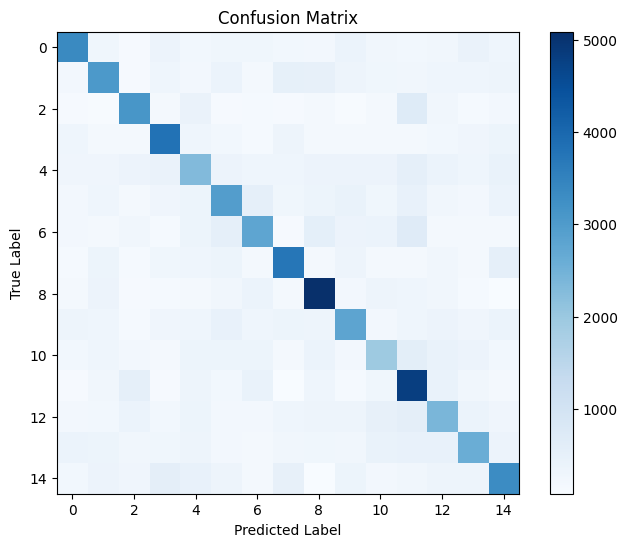

ic| epoch: 9
    phase: 'test'
    epoch_loss: tensor(0.2812, device='cuda:0')
    epoch_acc: tensor(0.2812, device='cuda:0', dtype=torch.float64)


In [14]:
import copy
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import StepLR

# Создание scheduler
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)  # Пример параметров: каждые 3 эпохи уменьшить LR в 10 раз

# Инициализация пустой матрицы ошибок и списков для сохранения предсказаний и меток
all_preds = []
all_labels = []

# Цикл обучения и валидации
for epoch in range(10):
    print("Epoch:", epoch) 
    for phase in ['train', 'val', 'test']:
        if phase == 'train':
            model.train()
        elif phase == 'val' or phase == 'test':
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders_dict[phase]:
            torch.cuda.empty_cache()
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # Добавление предсказаний и меток в списки
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_corrects / len(dataloaders_dict[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders_dict[phase].dataset)
            loss_history[phase].append(epoch_loss)
            acc_history[phase].append(epoch_acc)

            if phase != 'test' and epoch_acc > bests_acc:
                best_weights = copy.deepcopy(model.state_dict())
                bests_acc = epoch_acc

        # Обновление learning rate
        if phase == 'train':
            scheduler.step()

        # Вывод информации о текущем эпохе и фазе
        _ = ic(epoch, phase, epoch_loss, epoch_acc)

        # Вывод матрицы ошибок и вычисление F1-меры после валидации
        if phase == 'val' and epoch==9:
            cm = confusion_matrix(all_labels, all_preds)
            accuracy = accuracy_score(all_labels, all_preds)
            precision = precision_score(all_labels, all_preds, average='weighted')
            recall = recall_score(all_labels, all_preds, average='weighted')
            f1 = f1_score(all_labels, all_preds, average='weighted')
            print('Accuracy:', accuracy)
            print('Precision:', precision)
            print('Recall:', recall)
            print('F1 Score:', f1)

            # Отрисовка матрицы ошибок
            plt.figure(figsize=(8, 6))
            plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title('Confusion Matrix')
            plt.colorbar()
            # plt.xticks(range(len(classes)), classes, rotation=45)
            # plt.yticks(range(len(classes)), classes)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()